<a href="https://colab.research.google.com/github/carloscarvajal1cc/Business_Intelligence_Churn_Prediction/blob/master/Churn_Prediction_Model_for_CRM_Systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4: Churn Prediction Modeling for Business Intelligence for Telecommunication Companies














<br>32567: Business Intelligence for Decision Support, spring 2019
<br>By Carlos Mario Carvajal Moreno. Student ID: 13144148
<br>Andres Felipe Lagos Rodriguez. Student ID: 13092248
<br>Geoffrey Chai. Student ID: 13371618
<br>
<br> https://github.com/carloscarvajal1cc/Business_Intelligence_Churn_Prediction/blob/master/Churn_Prediction_Model_for_CRM_Systems.ipynb

## Importing the dataset 

In [1]:
import pandas as pd
import io

from google.colab import files
uploaded = files.upload()

Data = pd.read_csv(io.StringIO(uploaded['Churndata.csv'].decode('utf-8')))

Saving Churndata.csv to Churndata.csv


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

%matplotlib inline
matplotlib.style.use('ggplot')
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


from sklearn import preprocessing

from sklearn.model_selection import train_test_split

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

from sklearn.utils import resample

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC


from sklearn.ensemble import  BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification

from sklearn.cluster import KMeans

from time import time
import logging

from imblearn.over_sampling import SMOTE

from sklearn.neural_network import MLPClassifier

In [0]:
BackupData = Data.copy()

In [5]:
print(Data.columns)
print(Data.dtypes)

Index(['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'ServiceArea', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH',
       'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner',
       'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGro

In [0]:
# Encoding binart variables


Data["Churn"] = Data["Churn"].apply(lambda val:
                                       1 if val == "Yes" else 0)

Data["ChildrenInHH"] = Data["ChildrenInHH"].apply(lambda val:
                                       1 if val == "Yes" else 0)

Data["HandsetRefurbished"] = Data["HandsetRefurbished"].apply(lambda val:
                                       1 if val == "Yes" else 0)

Data["HandsetWebCapable"] = Data["HandsetWebCapable"].apply(lambda val:
                                       1 if val == "Yes" else 0)
Data["TruckOwner"] = Data["TruckOwner"].apply(lambda val:
                                       1 if val == "Yes" else 0)
Data["RVOwner"] = Data["RVOwner"].apply(lambda val:
                                       1 if val == "Yes" else 0)
Data["Homeownership"] = Data["Homeownership"].apply(lambda val:
                                       1 if val == "Unknown" else 0)

Data["BuysViaMailOrder"] = Data["BuysViaMailOrder"].apply(lambda val:
                                       1 if val == "Unknown" else 0)

Data["RespondsToMailOffers"] = Data["RespondsToMailOffers"].apply(lambda val:
                                       1 if val == "Unknown" else 0)
Data["OptOutMailings"] = Data["OptOutMailings"].apply(lambda val:
                                       1 if val == "Unknown" else 0)
Data["NonUSTravel"] = Data["NonUSTravel"].apply(lambda val:
                                       1 if val == "Unknown" else 0)
Data["OwnsComputer"] = Data["OwnsComputer"].apply(lambda val:
                                       1 if val == "Unknown" else 0)
Data["HasCreditCard"] = Data["HasCreditCard"].apply(lambda val:
                                       1 if val == "Unknown" else 0)
Data["NewCellphoneUser"] = Data["NewCellphoneUser"].apply(lambda val:
                                       1 if val == "Unknown" else 0)
Data["NotNewCellphoneUser"] = Data["NotNewCellphoneUser"].apply(lambda val:
                                       1 if val == "Unknown" else 0)
Data["OwnsMotorcycle"] = Data["OwnsMotorcycle"].apply(lambda val:
                                       1 if val == "Unknown" else 0)
Data["MadeCallToRetentionTeam"] = Data["MadeCallToRetentionTeam"].apply(lambda val:
                                       1 if val == "Unknown" else 0)
Data["CreditRating"] = Data["CreditRating"].apply(lambda val:
                                       1 if val == "1-Highest" else
                                                  2 if val == "2-High" else
                                                  3 if val == "3-Good" else
                                                  4 if val == "4-Medium" else
                                                  5 if val == "5-Low" else
                                                  6 if val == "6-VeryLow" 
                                                  else 7)

# Replacing Unknown for NaN values so python can recognize them as missing values


Data = Data.replace("Unknown","NaN")


# Leaving Marital Status as Unknown

Data['MaritalStatus'] = Data['MaritalStatus'].replace("NaN","Unknown")


#Dismissing Missing values

Data.dropna(inplace=True)


# Hot Encoding attributes

Data = pd.get_dummies(Data, columns=["PrizmCode", "Occupation","MaritalStatus"])


#Eliminating customerID as it is not relevant for analysis

Data = Data.drop('CustomerID', 1)

As HandsetPrice contain many missing values, that represent a large 
 proportion of the data, this attribute will not discard the missing values
instead they will be assumed as cero as the information does not exist


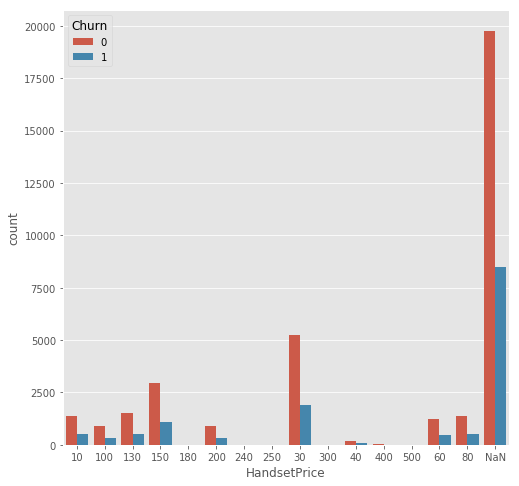

In [7]:
# Dealing with handsetprice

plt.figure(figsize=(8,8))
sns.countplot(x='HandsetPrice', hue='Churn', data=Data);

print('As HandsetPrice contain many missing values, that represent a large \n proportion '
      r'of the data, this attribute will not discard the missing values'
     '\ninstead they will be assumed as cero as the information does not exist')

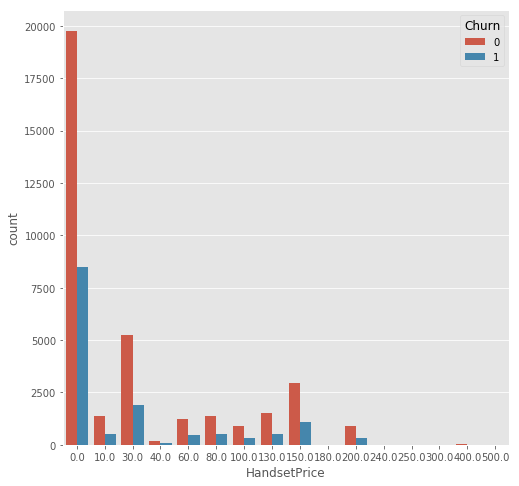

In [8]:
# Changing the values NaN for 0 in the attribute Handset Price
Data['HandsetPrice']=Data['HandsetPrice'].replace("NaN",0)


#Converting the attribute Handset Price into a float64 data type.

Data['HandsetPrice']=Data['HandsetPrice'].astype('float')


# Plotting the new Handset Price in a float64 format
plt.figure(figsize=(8,8))
sns.countplot(x='HandsetPrice', hue='Churn', data=Data)

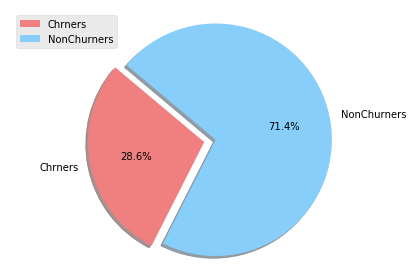

In [9]:
# Let's see the propportions of the churners in the data set.


Data['Churn'].value_counts()


labels = ['Chrners','NonChurners']
sizes = [Data.loc[Data.Churn == 1, 'Churn'].count(),Data.loc[Data.Churn == 0, 'Churn'].count()]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)



patches = plt.pie(sizes, colors=colors, labels=labels, shadow=True,
                         explode=explode,  startangle=140, autopct='%1.1f%%')

plt.legend(labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

We will keep in consideration balancing techniques.

In [10]:
# Correlation test 

Data.corr()['Churn'].sort_values(ascending = False)

Churn                      1.000000
CurrentEquipmentDays       0.102513
RetentionCalls             0.058422
RetentionOffersAccepted    0.034511
UniqueSubs                 0.032839
HandsetRefurbished         0.030026
MaritalStatus_Unknown      0.025298
MonthsInService            0.017544
OverageMinutes             0.015301
Homeownership              0.013716
PrizmCode_Rural            0.013098
ActiveSubs                 0.013049
PercChangeRevenues         0.013015
PrizmCode_Town             0.011725
RoamingCalls               0.010955
ChildrenInHH               0.009505
Occupation_Other           0.007613
Occupation_Homemaker       0.004795
Occupation_Student         0.003106
Occupation_Clerical        0.001502
Occupation_Crafts         -0.002720
CallForwardingCalls       -0.003161
RVOwner                   -0.003280
Occupation_Self           -0.003955
BlockedCalls              -0.004474
MaritalStatus_Yes         -0.004567
PrizmCode_Other           -0.004730
TruckOwner                -0

/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


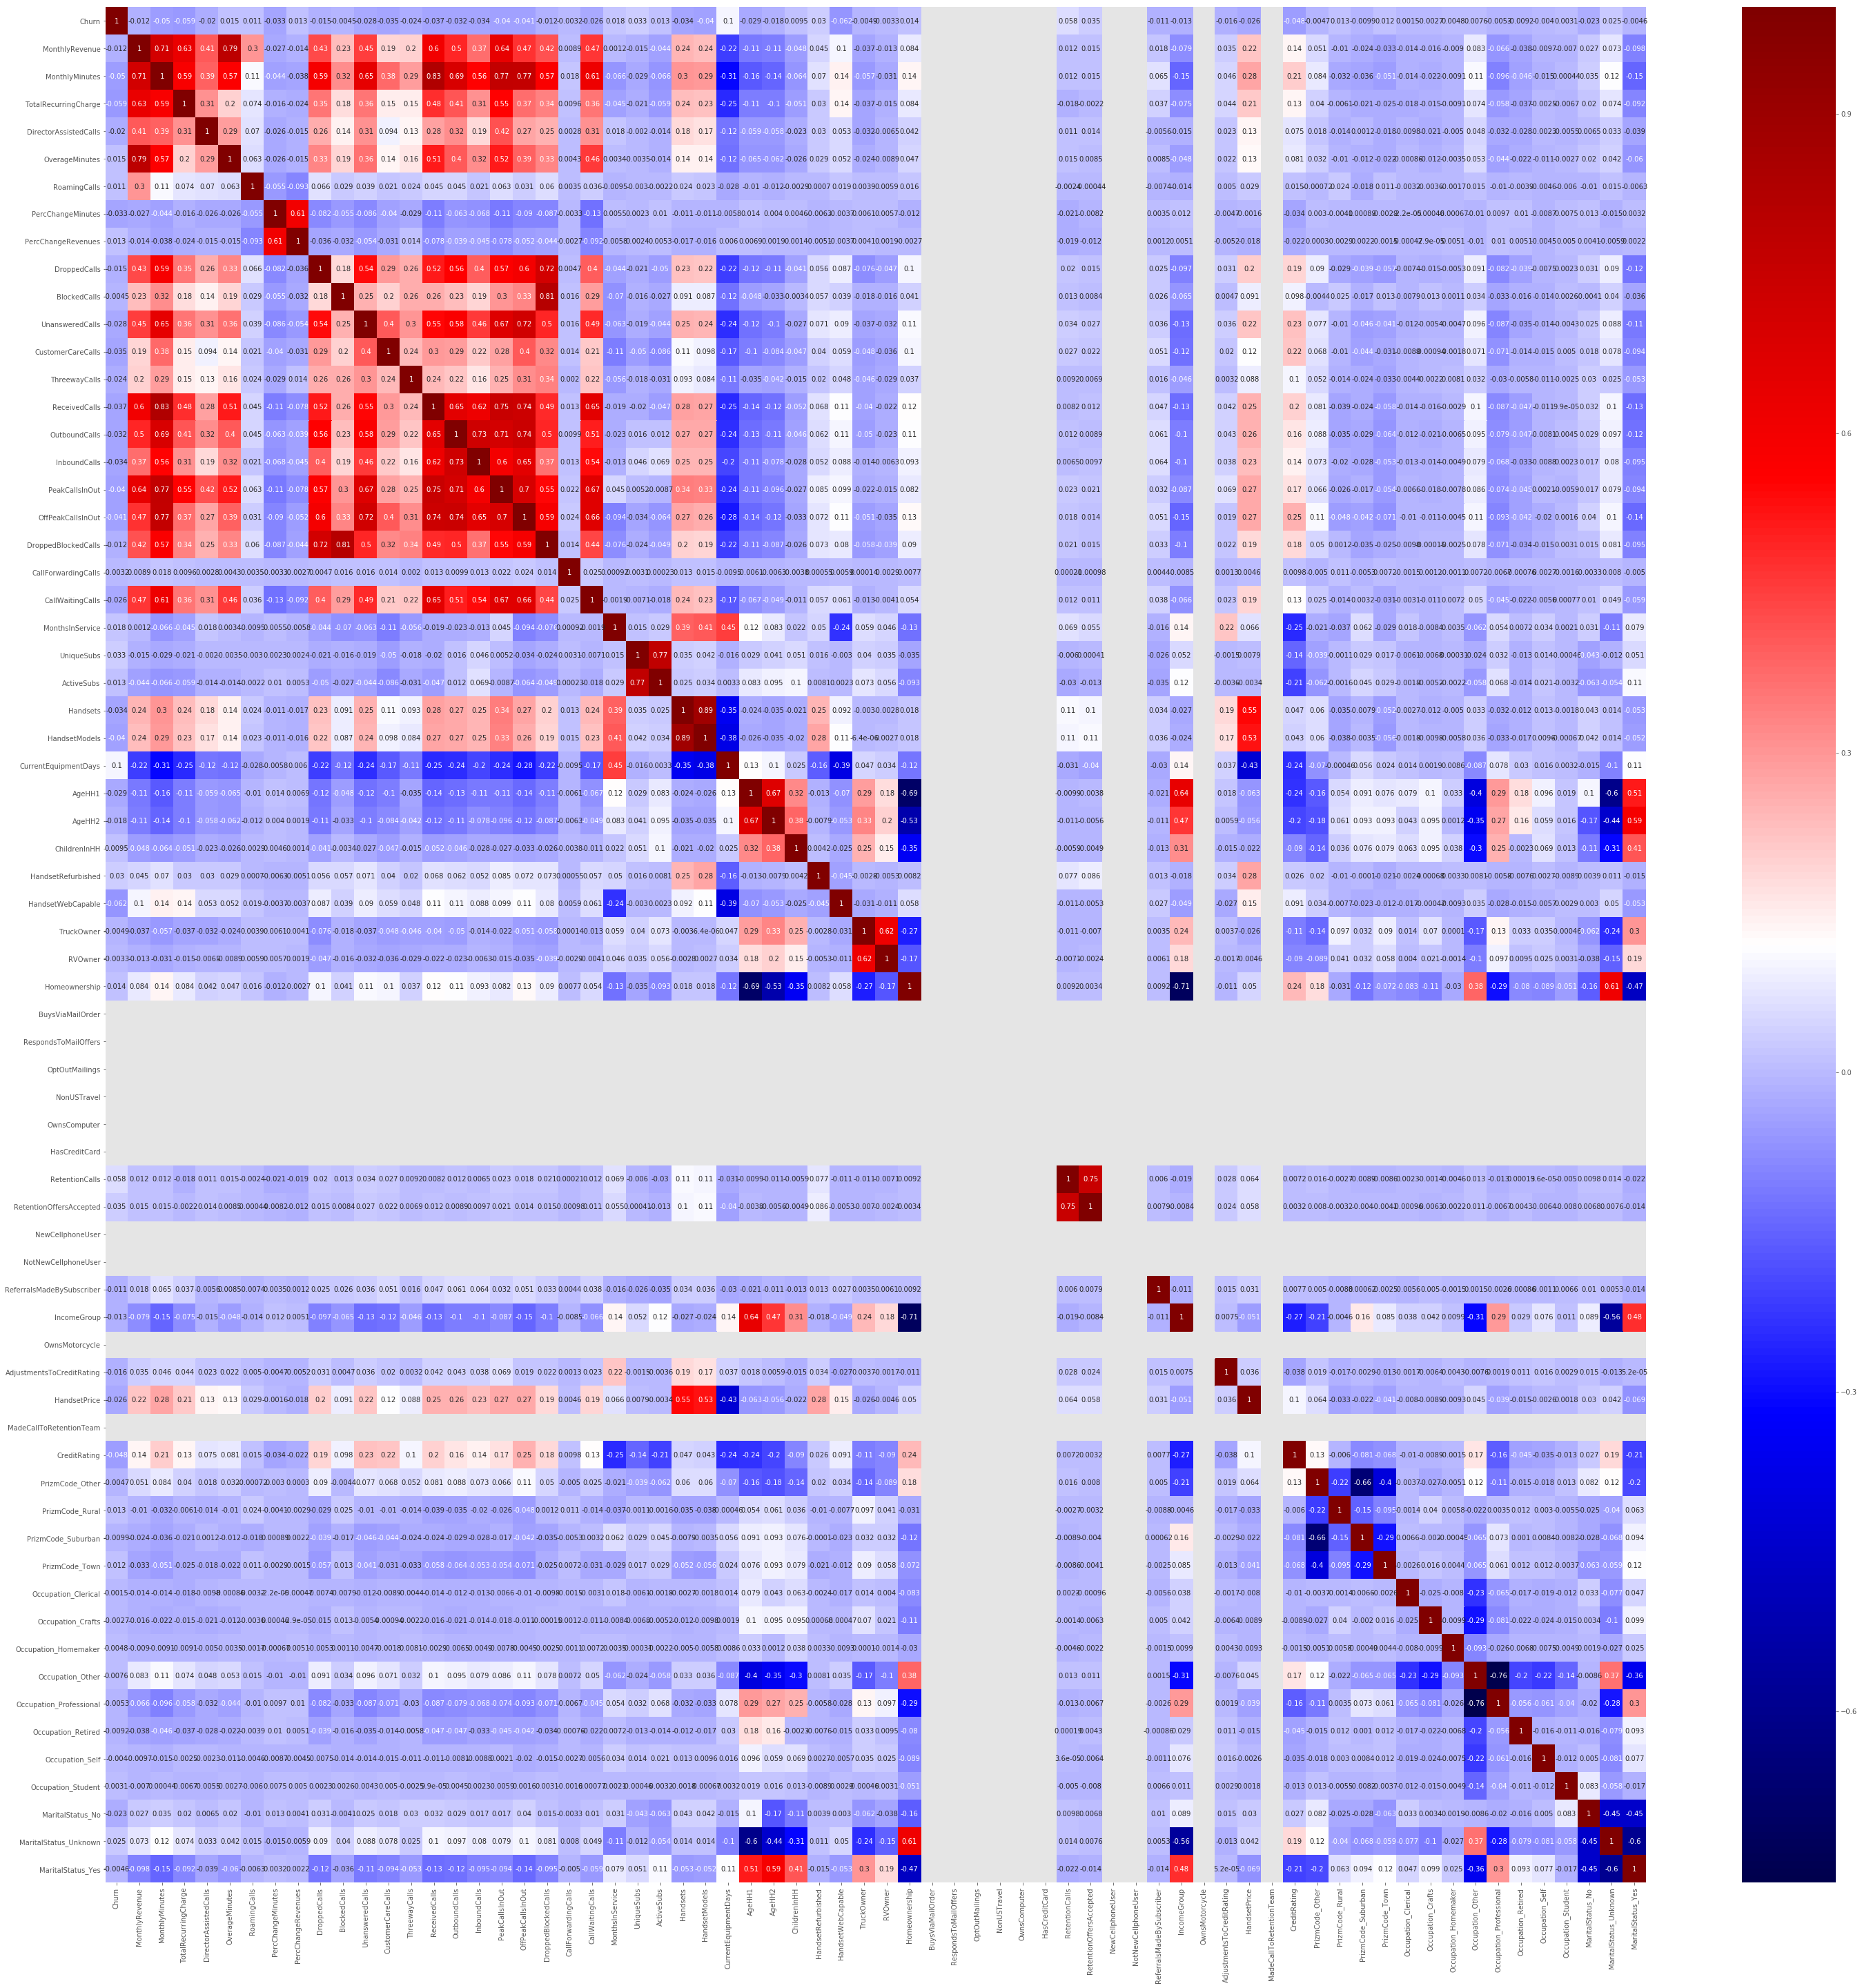

In [11]:
corrmat = Data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(50,50))
#plot heat map
g=sns.heatmap(Data[top_corr_features].corr(),annot=True,cmap="seismic")

Data.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis =1)

In [13]:
# Chi-Square test

#Dropping the categorical attributes for this test

NData = Data.copy()

NData = NData.drop('ServiceArea', 1)


#Splitting the data in accordance to Churn

X = NData.iloc[:,1:67] 

y = NData.iloc[:,0]  

# Take the columns separately in a list

columns = X.columns.tolist()

print(columns)



X_df = pd.DataFrame(X)
X_df.columns = columns

X_df.head()

['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser', 'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGroup', 'OwnsMotorcycle', 'AdjustmentsToCreditRating', 'HandsetPrice', 'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode_Other', 'Priz

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode_Other,PrizmCode_Rural,PrizmCode_Suburban,PrizmCode_Town,Occupation_Clerical,Occupation_Crafts,Occupation_Homemaker,Occupation_Other,Occupation_Professional,Occupation_Retired,Occupation_Self,Occupation_Student,MaritalStatus_No,MaritalStatus_Unknown
0,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,2.0,2.0,361.0,62.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,4,0,0,30.0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0
1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,2.0,1.0,1504.0,40.0,42.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,30.0,0,4,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,1.0,1.0,1812.0,26.0,26.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0.0,0,3,0,0,0,1,0,1,0,0,0,0,0,0,0,0
3,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,9.0,4.0,458.0,30.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,10.0,0,4,1,0,0,0,0,0,0,1,0,0,0,0,1,0
4,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,4.0,3.0,852.0,46.0,54.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,1,10.0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [14]:
# Lets transform  the data frame to a numpy array
x = X_df.to_numpy() 

# Applying the minmax normalization.
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

#Converting the array back to a pandas dataframe
X = pd.DataFrame(x_scaled)


#Let's assign the column names back to the normalized data frame.

X.columns  = columns

# Let's see the result

X.head()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode_Other,PrizmCode_Rural,PrizmCode_Suburban,PrizmCode_Town,Occupation_Clerical,Occupation_Crafts,Occupation_Homemaker,Occupation_Other,Occupation_Professional,Occupation_Retired,Occupation_Self,Occupation_Student,MaritalStatus_No,MaritalStatus_Unknown
0,0.024537,0.029759,0.068966,0.001568,0.0,0.0,0.410058,0.303158,0.003157,0.002156,0.007423,0.000000,0.000000,0.036102,0.000000,0.000000,0.027742,0.016274,0.003835,0.0,0.001410,1.000000,0.005128,0.018868,0.043478,0.071429,0.201431,0.626263,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.444444,0.0,0.00,0.06,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.018836,0.001359,0.056650,0.000000,0.0,0.0,0.426933,0.308448,0.001353,0.000000,0.003181,0.000000,0.000000,0.000000,0.000000,0.000000,0.002392,0.000678,0.000885,0.0,0.000000,0.945455,0.000000,0.018868,0.043478,0.000000,0.830490,0.404040,0.424242,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.555556,0.0,0.00,0.06,0.0,0.500000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.035924,0.001087,0.108374,0.000000,0.0,0.0,0.427153,0.308448,0.000000,0.000000,0.000000,0.000000,0.000000,0.000149,0.000466,0.000000,0.000622,0.002509,0.000000,0.0,0.000000,0.981818,0.000000,0.018868,0.000000,0.000000,1.000000,0.262626,0.262626,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.666667,0.0,0.00,0.00,0.0,0.333333,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.071937,0.178285,0.199507,0.007780,0.0,0.0,0.444690,0.310704,0.234551,0.023714,0.089549,0.013138,0.019697,0.074395,0.574732,0.283073,0.265796,0.205940,0.176106,0.0,0.106723,0.963636,0.005128,0.037736,0.347826,0.214286,0.254816,0.303030,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.666667,0.0,0.00,0.02,0.0,0.500000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.018958,0.000000,0.056650,0.000000,0.0,0.0,0.427374,0.308393,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.854545,0.005128,0.037736,0.130435,0.142857,0.471657,0.464646,0.545455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.000000,0.0,0.04,0.02,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [15]:
#apply SelectKBest class to extract top 20 best features
bestfeatures = SelectKBest(score_func=chi2, k=20)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#Putting together the two resulting colums into a dataframe  
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

#Giving names to the dataframe columns
featureScores.columns = ['Specs','Score']

 #printing the 20 best features according to CHIAD
print(featureScores.nlargest(20,'Score')) 

                      Specs      Score
41           RetentionCalls  48.782085
26     CurrentEquipmentDays  47.569053
30       HandsetRefurbished  38.633468
51             CreditRating  24.940342
42  RetentionOffersAccepted  21.988918
65    MaritalStatus_Unknown  19.905177
64         MaritalStatus_No  19.802903
31        HandsetWebCapable  18.878485
1            MonthlyMinutes   9.051235
25            HandsetModels   8.555775
53          PrizmCode_Rural   8.125496
17        OffPeakCallsInOut   7.187125
27                   AgeHH1   6.473766
34            Homeownership   6.344590
49             HandsetPrice   6.265087
13            ReceivedCalls   6.116654
55           PrizmCode_Town   5.809104
24                 Handsets   5.414007
2      TotalRecurringCharge   4.549103
16           PeakCallsInOut   4.497422


After performing all the analysis the attributes that will be considered for running the models are:

From Chi- square analysis:


                      Specs      
41           RetentionCalls  
26     CurrentEquipmentDays  
30       HandsetRefurbished  
51             CreditRating  
42  RetentionOffersAccepted  
65    MaritalStatus_Unknown  
64         MaritalStatus_No  
31        HandsetWebCapable  
1            MonthlyMinutes   
25            HandsetModels   
53          PrizmCode_Rural   
17        OffPeakCallsInOut   
27                   AgeHH1   
34            Homeownership   
49             HandsetPrice   
13            ReceivedCalls   
55           PrizmCode_Town   
24                 Handsets   
2      TotalRecurringCharge  
16           PeakCallsInOut  

plus: from correlation analysis

UniqueSubs

HandsetWebCapable

InboundCalls

PercChangeMinutes

UnansweredCalls

ThreewayCalls

CallWaitingCalls

## Creating the Dataframe only with the 27 selected features.

In [16]:
#Selecting the column names
NewColumns = ['Churn','RetentionCalls','CurrentEquipmentDays','HandsetRefurbished',
            'CreditRating','RetentionOffersAccepted','MaritalStatus_Unknown',
            'MaritalStatus_No','HandsetWebCapable','MonthlyMinutes','HandsetModels',
            'PrizmCode_Rural','OffPeakCallsInOut','AgeHH1','Homeownership','HandsetPrice',
            'ReceivedCalls','PrizmCode_Town','Handsets','TotalRecurringCharge','PeakCallsInOut',
            'UniqueSubs','InboundCalls','PercChangeMinutes',
             'UnansweredCalls','ThreewayCalls','CallWaitingCalls']



#Creating the final dataset

finalData = Data[NewColumns].copy()

finalData.head()

,Churn,RetentionCalls,CurrentEquipmentDays,HandsetRefurbished,CreditRating,RetentionOffersAccepted,MaritalStatus_Unknown,MaritalStatus_No,HandsetWebCapable,MonthlyMinutes,HandsetModels,PrizmCode_Rural,OffPeakCallsInOut,AgeHH1,Homeownership,HandsetPrice,ReceivedCalls,PrizmCode_Town,Handsets,TotalRecurringCharge,PeakCallsInOut,UniqueSubs,InboundCalls,PercChangeMinutes,UnansweredCalls,ThreewayCalls,CallWaitingCalls
0,1,1,361.0,0,1,0,0,1,1,219.0,2.0,0,24.0,62.0,0,30.0,97.2,0,2.0,22.0,58.0,2,0.0,-157.0,6.3,0.0,0.3
1,1,0,1504.0,0,4,0,0,0,0,10.0,1.0,0,1.0,40.0,0,30.0,0.0,0,2.0,17.0,5.0,1,0.0,-4.0,2.7,0.0,0.0
2,0,0,1812.0,0,3,0,0,0,0,8.0,1.0,0,3.7,26.0,1,0.0,0.4,1,1.0,38.0,1.3,1,0.0,-2.0,0.0,0.0,0.0
3,0,0,458.0,0,4,0,0,1,1,1312.0,4.0,0,303.7,30.0,0,10.0,200.3,0,9.0,75.0,555.7,2,147.0,157.0,76.0,1.3,22.7
4,1,0,852.0,0,1,0,0,0,0,0.0,3.0,0,0.0,46.0,0,10.0,0.0,0,4.0,17.0,0.0,2,0.0,0.0,0.0,0.0,0.0


## Predictive Modeling

In [100]:
CopyData = finalData.copy()

CopyData.head()

,Churn,RetentionCalls,CurrentEquipmentDays,HandsetRefurbished,CreditRating,RetentionOffersAccepted,MaritalStatus_Unknown,MaritalStatus_No,HandsetWebCapable,MonthlyMinutes,HandsetModels,PrizmCode_Rural,OffPeakCallsInOut,AgeHH1,Homeownership,HandsetPrice,ReceivedCalls,PrizmCode_Town,Handsets,TotalRecurringCharge,PeakCallsInOut,UniqueSubs,InboundCalls,PercChangeMinutes,UnansweredCalls,ThreewayCalls,CallWaitingCalls
0,1,1,361.0,0,1,0,0,1,1,219.0,2.0,0,24.0,62.0,0,30.0,97.2,0,2.0,22.0,58.0,2,0.0,-157.0,6.3,0.0,0.3
1,1,0,1504.0,0,4,0,0,0,0,10.0,1.0,0,1.0,40.0,0,30.0,0.0,0,2.0,17.0,5.0,1,0.0,-4.0,2.7,0.0,0.0
2,0,0,1812.0,0,3,0,0,0,0,8.0,1.0,0,3.7,26.0,1,0.0,0.4,1,1.0,38.0,1.3,1,0.0,-2.0,0.0,0.0,0.0
3,0,0,458.0,0,4,0,0,1,1,1312.0,4.0,0,303.7,30.0,0,10.0,200.3,0,9.0,75.0,555.7,2,147.0,157.0,76.0,1.3,22.7
4,1,0,852.0,0,1,0,0,0,0,0.0,3.0,0,0.0,46.0,0,10.0,0.0,0,4.0,17.0,0.0,2,0.0,0.0,0.0,0.0,0.0


In [0]:
#Creating a copy

CopyData = finalData.copy()

#spliting the data between dependent variables and independet variables
#customer ID is elminated from the data as it is not relevant for modeling.

X = CopyData.iloc[:,1:]

#independent variable.

y = CopyData.iloc[:,0]


# Saving the columns separately in a list.

columns = X.columns.tolist()

#Converting the dataframe to a numpy array.
npX = X.to_numpy()


#Spliting the data into 60% training, 20% validating and 20% testing sets.

X_train, X_test, y_train, y_test = train_test_split(
    npX, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=1)

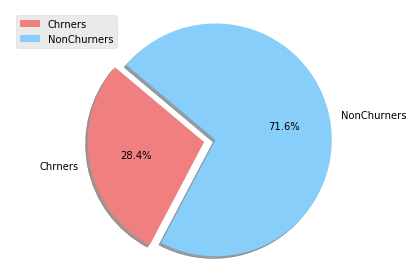

In [105]:
#saving the X_train into a dataframe
traindataframe = pd.DataFrame(X_train)

y_train

#Converting the Y train array into a pandas data frame

ytraindataframe = pd.DataFrame(y_train)

#Plotting proportions to see if it is necessary to balance the data

labels = ['Chrners','NonChurners']
sizes = [ytraindataframe.loc[ytraindataframe.Churn == 1, 'Churn'].count(),ytraindataframe.loc[ytraindataframe.Churn == 0, 'Churn'].count()]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)



patches = plt.pie(sizes, colors=colors, labels=labels, shadow=True,
                         explode=explode,  startangle=140, autopct='%1.1f%%')

plt.legend(labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

### Balancing the training set with SMOT

In [0]:
#Converting to numpy arrays

X_train1 = traindataframe.to_numpy()
y_train1 = ytraindataframe.to_numpy()

# transforming y_train array into an 1d array using ravel()

y_train1= np.ravel(y_train1)

# Resampling.

sm = SMOTE(random_state=42, ratio=1.0)

X_train2, y_train2 = sm.fit_sample(X_train1, y_train1)

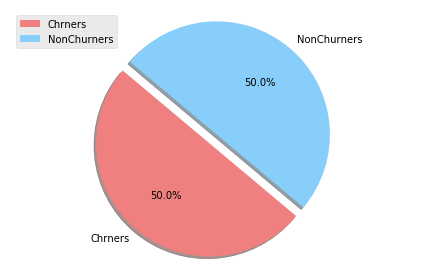

In [107]:
# Verifying Oversampling.

w = pd.DataFrame(y_train2)
w.columns = ['Churn']

labels = ['Chrners','NonChurners']
sizes = [w.loc[w.Churn == 1, 'Churn'].count(),w.loc[w.Churn == 0, 'Churn'].count()]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)



patches = plt.pie(sizes, colors=colors, labels=labels, shadow=True,
                         explode=explode,  startangle=140, autopct='%1.1f%%')

plt.legend(labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

### Normalizing the data

In [0]:
sc = StandardScaler()

X_train2 = sc.fit_transform(X_train2)
X_test = sc.transform(X_test)
X_val = sc.transform(X_val)

## PCA

In [109]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_train2)  
PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

print(pca.explained_variance_ratio_)  
print(pca.singular_values_) 

X_Train_PCA = pca.fit_transform(X_train2)

print(X_Train_PCA)

[0.2450902  0.09428433]
[521.99758775 323.76155326]
[[ 0.03035371  0.2395004 ]
 [-1.06653395  1.0220352 ]
 [-0.88080326 -2.70067062]
 ...
 [-0.46621133  0.81858305]
 [ 0.75631478  0.71109594]
 [-1.50030793 -0.11057351]]


# Cluster Analysis

[[-0.96662734 -0.01923307]
 [ 3.89378954  0.07747507]]


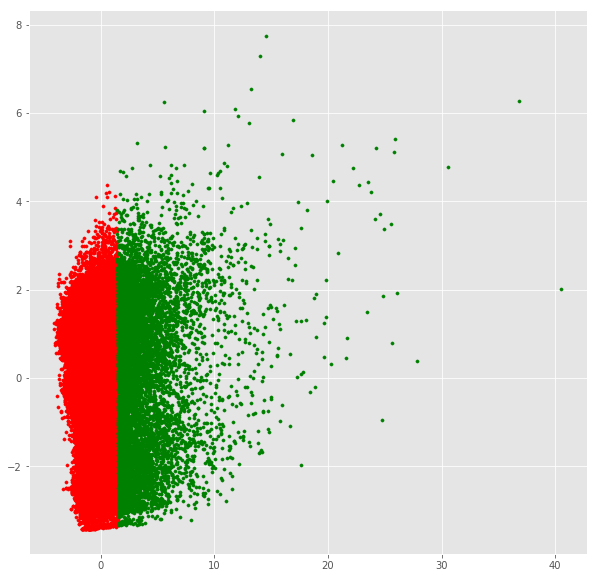

In [110]:
# create kmeans object
kmeans = KMeans(n_clusters=2)

# fit kmeans object to train pca data
kmeans.fit(X_Train_PCA)

# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)

# Assigning the cluster 
y_km = kmeans.fit_predict(X_Train_PCA)

#Plotting the cluster
plt.figure(figsize=(10,10))
plt.scatter(X_Train_PCA[y_km ==0,0], X_Train_PCA[y_km == 0,1], s=10, c='red')
plt.scatter(X_Train_PCA[y_km ==1,0], X_Train_PCA[y_km == 1,1], s=10, c='green')



In [111]:
# Converting the balanced array to a dataframe

TrainBDF = pd.DataFrame(X_train2[:,:])

TrainBDF.columns = columns

# Assigning the cluster. With this we will assign cluster number to the unseen data.
y_km = kmeans.fit_predict(X_Train_PCA)

#Converting the cluster into a group

cluster = y_km.tolist()


# Adding the cluster column to the training dataset

TrainBDF['Clusters'] = cluster
TrainBDF['Churn'] = y_train2
TrainBDF.head()

,RetentionCalls,CurrentEquipmentDays,HandsetRefurbished,CreditRating,RetentionOffersAccepted,MaritalStatus_Unknown,MaritalStatus_No,HandsetWebCapable,MonthlyMinutes,HandsetModels,PrizmCode_Rural,OffPeakCallsInOut,AgeHH1,Homeownership,HandsetPrice,ReceivedCalls,PrizmCode_Town,Handsets,TotalRecurringCharge,PeakCallsInOut,UniqueSubs,InboundCalls,PercChangeMinutes,UnansweredCalls,ThreewayCalls,CallWaitingCalls,Clusters,Churn
0,-0.195174,-0.651112,-0.431687,1.459345,-0.138419,-0.820472,1.834279,0.365083,-0.175427,-0.620156,-0.240335,0.503162,-0.516005,-0.718668,-0.617472,0.054644,-0.451652,-0.607935,1.046331,-0.032182,-0.402177,-0.373125,0.788921,0.103162,-0.256276,-0.278627,0,0
1,-0.195174,-0.103754,-0.431687,1.459345,-0.138419,-0.820472,1.834279,0.365083,-0.146909,0.533831,-0.240335,-0.735129,0.234234,-0.718668,-0.075816,-0.687483,-0.451652,0.175819,0.213044,-0.878633,-0.402177,-0.500451,0.328504,-0.740993,-0.256276,-0.336172,0,0
2,-0.195174,-0.151008,-0.431687,-0.553866,-0.138419,1.334331,-0.604492,0.365083,-0.125997,-0.620156,-0.240335,-0.735129,-1.453804,1.511193,-0.617472,-0.687483,-0.451652,-0.607935,1.704190,-0.878633,0.338715,-0.500451,-1.025434,-0.740993,-0.256276,-0.336172,0,1
3,-0.195174,-0.359713,-0.431687,0.788275,-0.138419,-0.820472,-0.604492,0.365083,1.079338,-0.620156,-0.240335,2.217977,0.234234,-0.718668,-0.617472,1.348765,-0.451652,-0.607935,0.607759,0.577423,-0.402177,-0.010246,-2.320843,-0.290597,1.248922,0.565363,1,0
4,-0.195174,1.530442,-0.431687,-1.224936,-0.138419,1.334331,-0.604492,0.365083,-0.696344,0.533831,-0.240335,-0.503579,0.703134,-0.718668,0.465840,-0.543351,-0.451652,0.959573,-0.707958,-0.226056,-0.402177,-0.500451,-0.245066,-0.678962,-0.256276,-0.336172,0,1


In [112]:
TrainBDF[['HandsetRefurbished','MaritalStatus_Unknown',
          'MaritalStatus_No','HandsetWebCapable','PrizmCode_Rural','Homeownership',
          'PrizmCode_Town']] = TrainBDF[['HandsetRefurbished','MaritalStatus_Unknown',
          'MaritalStatus_No','HandsetWebCapable','PrizmCode_Rural','Homeownership',
          'PrizmCode_Town']].astype(object)

TrainBDF.head()

,RetentionCalls,CurrentEquipmentDays,HandsetRefurbished,CreditRating,RetentionOffersAccepted,MaritalStatus_Unknown,MaritalStatus_No,HandsetWebCapable,MonthlyMinutes,HandsetModels,PrizmCode_Rural,OffPeakCallsInOut,AgeHH1,Homeownership,HandsetPrice,ReceivedCalls,PrizmCode_Town,Handsets,TotalRecurringCharge,PeakCallsInOut,UniqueSubs,InboundCalls,PercChangeMinutes,UnansweredCalls,ThreewayCalls,CallWaitingCalls,Clusters,Churn
0,-0.195174,-0.651112,-0.431687,1.459345,-0.138419,-0.820472,1.83428,0.365083,-0.175427,-0.620156,-0.240335,0.503162,-0.516005,-0.718668,-0.617472,0.054644,-0.451652,-0.607935,1.046331,-0.032182,-0.402177,-0.373125,0.788921,0.103162,-0.256276,-0.278627,0,0
1,-0.195174,-0.103754,-0.431687,1.459345,-0.138419,-0.820472,1.83428,0.365083,-0.146909,0.533831,-0.240335,-0.735129,0.234234,-0.718668,-0.075816,-0.687483,-0.451652,0.175819,0.213044,-0.878633,-0.402177,-0.500451,0.328504,-0.740993,-0.256276,-0.336172,0,0
2,-0.195174,-0.151008,-0.431687,-0.553866,-0.138419,1.33433,-0.604492,0.365083,-0.125997,-0.620156,-0.240335,-0.735129,-1.453804,1.51119,-0.617472,-0.687483,-0.451652,-0.607935,1.704190,-0.878633,0.338715,-0.500451,-1.025434,-0.740993,-0.256276,-0.336172,0,1
3,-0.195174,-0.359713,-0.431687,0.788275,-0.138419,-0.820472,-0.604492,0.365083,1.079338,-0.620156,-0.240335,2.217977,0.234234,-0.718668,-0.617472,1.348765,-0.451652,-0.607935,0.607759,0.577423,-0.402177,-0.010246,-2.320843,-0.290597,1.248922,0.565363,1,0
4,-0.195174,1.530442,-0.431687,-1.224936,-0.138419,1.33433,-0.604492,0.365083,-0.696344,0.533831,-0.240335,-0.503579,0.703134,-0.718668,0.465840,-0.543351,-0.451652,0.959573,-0.707958,-0.226056,-0.402177,-0.500451,-0.245066,-0.678962,-0.256276,-0.336172,0,1


## Creating 2 datasets for 2 cluster groups

In [0]:
# Creating 2 the 2 Cluster groups
 

# Selecting the rows with value cluster = 0
Cluster1 = TrainBDF.loc[TrainBDF['Clusters'] == 0]

# Selecting the rows with value cluster = 1
Cluster2 = TrainBDF.loc[TrainBDF['Clusters'] == 1]


### Cluster 1

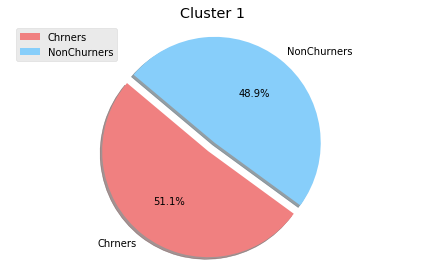

In [119]:
#Dependent Variables
Xc1 = Cluster1.iloc[:,0:26]

#independent variable.

yc1 = Cluster1['Churn']


#Converting to numpy arrays

X_trainC1 = Xc1.to_numpy()
y_trainC1 = np.ravel(yc1.to_numpy())


w = pd.DataFrame(y_trainC1)
w.columns = ['Churn']

labels = ['Chrners','NonChurners']
sizes = [w.loc[w.Churn == 1, 'Churn'].count(),w.loc[w.Churn == 0, 'Churn'].count()]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)



patches = plt.pie(sizes, colors=colors, labels=labels, shadow=True,
                         explode=explode,  startangle=140, autopct='%1.1f%%')

plt.title('Cluster 1')
plt.legend(labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

### Cluster 2

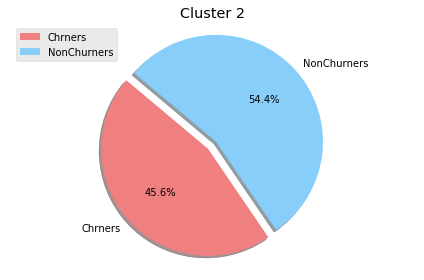

In [120]:
#Dependent Variables
Xc2 = Cluster2.iloc[:,0:26]

#independent variable.

yc2 = Cluster2['Churn']


#Converting to numpy arrays

X_trainC2 = Xc2.to_numpy()
y_trainC2 = np.ravel(yc2.to_numpy())


w = pd.DataFrame(y_trainC2)
w.columns = ['Churn']

labels = ['Chrners','NonChurners']
sizes = [w.loc[w.Churn == 1, 'Churn'].count(),w.loc[w.Churn == 0, 'Churn'].count()]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)



patches = plt.pie(sizes, colors=colors, labels=labels, shadow=True,
                         explode=explode,  startangle=140, autopct='%1.1f%%')

plt.title('Cluster 2')
plt.legend(labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

### Applying clustering to the training and validating sets.

In [121]:
#saving the X_test into a dataframe
test = pd.DataFrame(X_test[:,:])
ytest = pd.DataFrame(y_test)

#Converting to numpy arrays
X_test = test.to_numpy()
y_test = np.ravel(ytest.to_numpy())


#saving the X_val into a dataframe
val = pd.DataFrame(X_val[:,:])
yval = pd.DataFrame(y_val)

#Converting to numpy arrays
X_val = val.to_numpy()
y_val = np.ravel(yval.to_numpy())


# PCA
X_Test_PCA = pca.fit_transform(X_test[:,:])
X_val_PCA = pca.fit_transform(X_val[:,:])


#Assigning Clusters

y_km_Test = kmeans.fit_predict(X_Test_PCA)
y_km_Val = kmeans.fit_predict(X_val_PCA)

#Converting the cluster into a group
cluster_Test = y_km_Test.tolist()
cluster_Val = y_km_Val.tolist()


# Adding the cluster column to the test dataset
test.columns = columns
test['Clusters'] = cluster_Test
test['Churn'] = y_test


# Adding the cluster column to the val dataset
val.columns = columns
val['Clusters'] = cluster_Val
val['Churn'] = y_val
val.head()


,RetentionCalls,CurrentEquipmentDays,HandsetRefurbished,CreditRating,RetentionOffersAccepted,MaritalStatus_Unknown,MaritalStatus_No,HandsetWebCapable,MonthlyMinutes,HandsetModels,PrizmCode_Rural,OffPeakCallsInOut,AgeHH1,Homeownership,HandsetPrice,ReceivedCalls,PrizmCode_Town,Handsets,TotalRecurringCharge,PeakCallsInOut,UniqueSubs,InboundCalls,PercChangeMinutes,UnansweredCalls,ThreewayCalls,CallWaitingCalls,Clusters,Churn
0,-0.195174,-0.123444,-0.431687,0.788275,-0.138419,1.334331,-0.604492,-3.032265,-0.253374,-0.620156,-0.240335,-0.463309,-1.453804,1.511193,-0.617472,-0.222580,2.463511,-0.607935,-0.050099,-0.109132,-0.402177,-0.500451,0.613338,-0.174627,-0.256276,-0.278627,1,0
1,-0.195174,0.266401,-0.431687,-0.553866,-0.138419,-0.820472,1.834279,0.365083,-0.359839,-0.620156,-0.240335,-0.463309,-0.140885,-0.718668,-0.617472,-0.262447,2.463511,-0.607935,-0.707958,-0.279022,-0.402177,-0.481352,0.117805,-0.533325,-0.256276,-0.201901,1,0
2,-0.195174,-0.989764,-0.431687,-1.224936,-0.138419,1.334331,-0.604492,0.365083,1.750446,-0.620156,-0.240335,0.207852,-1.453804,1.511193,-0.075816,0.225149,-0.451652,0.175819,0.607759,0.007792,-0.402177,0.308069,-1.216624,0.022253,-0.256276,-0.086811,1,1
3,-0.195174,-0.824376,-0.431687,1.459345,-0.138419,-0.820472,-0.604492,0.365083,-0.414973,0.533831,-0.240335,-0.313417,0.421794,-0.718668,-0.075816,-0.454418,-0.451652,0.175819,-0.050099,-0.545849,-0.402177,-0.436788,0.351915,-0.533325,-0.256276,-0.201901,1,1
4,-0.195174,-0.190387,-0.431687,0.117204,-0.138419,-0.820472,-0.604492,0.365083,0.550816,-0.620156,-0.240335,1.807451,-0.140885,-0.718668,-0.617472,0.881410,-0.451652,-0.607935,1.046331,1.366911,-0.402177,4.866339,-0.775716,-0.166536,0.363511,-0.336172,0,1


### Forming Clusters for model. Test set

In [136]:
yTC2

9       1
11      1
14      0
17      0
23      0
24      0
28      0
34      0
35      0
47      0
48      0
61      1
64      1
73      0
75      0
78      0
81      0
85      0
88      0
92      0
100     1
101     0
106     0
107     0
112     0
113     0
122     0
136     0
142     0
149     0
       ..
9780    0
9782    0
9784    0
9796    0
9808    0
9811    1
9817    0
9828    1
9829    0
9830    1
9835    0
9848    0
9852    0
9854    0
9857    0
9859    0
9865    0
9869    0
9882    1
9884    0
9886    1
9892    0
9900    1
9911    0
9925    1
9928    0
9933    0
9934    0
9939    0
9942    1
Name: Churn, Length: 1894, dtype: int64

In [0]:
# Creating 2 the 2 Cluster groups
 

# Selecting the rows with value cluster = 0
TCluster1 = test.loc[test['Clusters'] == 0]

# Selecting the rows with value cluster = 1
TCluster2 = test.loc[test['Clusters'] == 1]



#Dependent Variables
XTC1 = TCluster1.iloc[:,0:26]
#independent variable.
yTC1 = TCluster1['Churn']

#Dependent Variables
XTC2 = TCluster2.iloc[:,0:26]
#independent variable.
yTC2 = TCluster2['Churn']





#Converting to numpy arrays

X_testC1 = XTC1.to_numpy()
y_testC1 = np.ravel(yTC1.to_numpy())

#Converting to numpy arrays


X_testC2 = XTC2.to_numpy()
y_testC2 = np.ravel(yTC2.to_numpy())



### Forming Clusters for model. Val set

In [0]:
# Creating 2 the 2 Cluster groups
 

# Selecting the rows with value cluster = 0
VCluster1 = val.loc[val['Clusters'] == 0]

# Selecting the rows with value cluster = 1
VCluster2 = val.loc[val['Clusters'] == 1]




#Dependent Variables
XVC1 = VCluster1.iloc[:,0:26]
#independent variable.
yVC1 = VCluster1['Churn']

#Dependent Variables
XVC2 = VCluster2.iloc[:,0:26]
#independent variable.
yVC2 = VCluster2['Churn']




#Converting to numpy arrays
X_valC1 = XVC1.to_numpy()
y_valC1 = np.ravel(yVC1.to_numpy())

#Converting to numpy arrays
X_valC2 = XVC2.to_numpy()
y_valC2 = np.ravel(yVC2.to_numpy())



## Artificial Neural Netwrok

### Cluster 1

In [38]:
print("Training the Artificial Neural Network classifier with training set")

t0 = time()

param_grid = {'max_iter': (100,1000,100)}

clfc1 = GridSearchCV(MLPClassifier(alpha=1e-5, warm_start=True,
                    hidden_layer_sizes=(5, 20, 20, 10, 10, 5,2,100,300),
                    random_state=1,
                    activation='relu', solver='adam'),
                     param_grid, cv=5, iid=False)


clfc1 = clfc1.fit(X_trainC1[:,1:], y_trainC1)
print("done in {}s".format(time() - t0))
print("Best estimator found by grid search:")
print(clfc1.best_estimator_)


Training the Artificial Neural Network classifier with training set
done in 753.7717123031616s
Best estimator found by grid search:
MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 20, 20, 10, 10, 5, 2, 100, 300),
              learning_rate='constant', learning_rate_init=0.001, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=True)


In [0]:
MLPClassifier(alpha=1e-5, max_iter=500, warm_start=True,
                    hidden_layer_sizes=(5, 20, 20, 10, 10, 5,2,100,300),
                    random_state=1,
                    activation='relu', solver='adam')
              
clfc1 = clfc1.fit(X_trainC1, y_trainC1)

In [129]:
print("Predicting Churning")
t0 = time()
y_pred = clfc1.predict(X_testC1)
print("done in {}s".format(time() - t0))

print(classification_report(y_testC1, y_pred))
print(confusion_matrix(y_testC1, y_pred, labels=[0, 1]))

Predicting Churning
done in 0.04252767562866211s
              precision    recall  f1-score   support

           0       0.71      0.94      0.81      5609
           1       0.44      0.12      0.19      2448

    accuracy                           0.69      8057
   macro avg       0.58      0.53      0.50      8057
weighted avg       0.63      0.69      0.62      8057

[[5249  360]
 [2161  287]]


### Testing with unseen data.  Validation Test

In [130]:
print("Predicting Churning on Unseen Data")
t0 = time()
y_pred = clfc1.predict(X_valC1)
print("done in {}s".format(time() - t0))

print(classification_report(y_valC1, y_pred))
print(confusion_matrix(y_valC1, y_pred, labels=[0, 1]))

Predicting Churning on Unseen Data
done in 0.014090776443481445s
              precision    recall  f1-score   support

           0       0.75      0.92      0.83      1453
           1       0.36      0.13      0.19       504

    accuracy                           0.72      1957
   macro avg       0.56      0.52      0.51      1957
weighted avg       0.65      0.72      0.66      1957

[[1335  118]
 [ 438   66]]


### Cluster 2

In [131]:
print("Training the Artificial Neural Network classifier with training set")

t0 = time()

param_grid = {'max_iter': (300,400)}

clfc2 = GridSearchCV(MLPClassifier(alpha=1e-5, warm_start=True,
                    hidden_layer_sizes=(5, 20, 20, 10, 10, 5,2,100,300),
                    random_state=1,
                    activation='relu', solver='adam'),
                     param_grid, cv=5, iid=False)


clfc2 = clfc2.fit(X_trainC2, y_trainC2)
print("done in {}s".format(time() - t0))
print("Best estimator found by grid search:")
print(clfc2.best_estimator_)


Training the Artificial Neural Network classifier with training set
done in 405.85496830940247s
Best estimator found by grid search:
MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 20, 20, 10, 10, 5, 2, 100, 300),
              learning_rate='constant', learning_rate_init=0.001, max_iter=300,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=True)


In [0]:
clfc2 = MLPClassifier(alpha=1e-5, warm_start=True,
                    hidden_layer_sizes=(5,20,5,4,10,50,30),
                    random_state=1,
                    activation='relu', solver='adam', max_iter=500)

clfc2 = clfc2.fit(X_trainC2, y_trainC2)

In [159]:
print("Predicting Churning")
t0 = time()
y_pred = clfc2.predict(X_testC2)
print("done in {}s".format(time() - t0))

print(classification_report(y_testC2, y_pred))
print(confusion_matrix(y_testC2, y_pred, labels=[0, 1]))



Predicting Churning
done in 0.003559112548828125s
              precision    recall  f1-score   support

           0       0.77      0.76      0.77      1425
           1       0.30      0.32      0.31       469

    accuracy                           0.65      1894
   macro avg       0.54      0.54      0.54      1894
weighted avg       0.66      0.65      0.65      1894

[[1084  341]
 [ 321  148]]


### Testing with unseen data.  Validation Test

In [133]:
print("Predicting Churning on Unseen Data")
t0 = time()
y_pred = clfc2.predict(X_valC2)
print("done in {}s".format(time() - t0))

print(classification_report(y_valC2, y_pred))
print(confusion_matrix(y_valC2, y_pred, labels=[0, 1]))

Predicting Churning on Unseen Data
done in 0.03685474395751953s
              precision    recall  f1-score   support

           0       0.73      0.45      0.56      5640
           1       0.31      0.59      0.41      2354

    accuracy                           0.49      7994
   macro avg       0.52      0.52      0.48      7994
weighted avg       0.60      0.49      0.51      7994

[[2561 3079]
 [ 961 1393]]


## Output of this model for decision making

In [95]:

#Example of prediction list as an output of prototype for decision making

output_list = pd.DataFrame(X_valC2)


output_list.columns = columns[1:]

output_list["Prediction"] = y_pred

print(output_list.loc[output_list.Prediction == 1])

      CurrentEquipmentDays  HandsetRefurbished  ...  CallWaitingCalls  Prediction
2                -1.186655           -0.431687  ...          0.373547           1
4                 0.581427           -0.431687  ...          0.622908           1
5                -0.505412           -0.431687  ...          0.296821           1
6                 1.305986           -0.431687  ...          0.872269           1
9                 0.238836            2.562408  ...          3.250787           1
10               -0.934635            2.562408  ...          0.296821           1
12               -0.938573           -0.431687  ...          0.296821           1
15                0.195520           -0.431687  ...          3.691964           1
16               -0.851941           -0.431687  ...         -0.201901           1
18               -0.517226            2.562408  ...          0.181731           1
20               -1.462303           -0.431687  ...          1.255901           1
22              